In [10]:
import pandas as pd
filename="/content/drive/MyDrive/English_Merged_Tweets.csv"
df = pd.read_csv(filename)
print(df.columns.tolist())

['clean_text', 'Label', 'tokenized_text', 'filtered_text', 'stemmed_text', 'lemmatized_text']


<ipython-input-10-727622cc8622>:3: DtypeWarning:

Columns (0,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.



In [11]:
total_rows = len(df)
print("Total rows in the dataset:", total_rows)

Total rows in the dataset: 202260


In [12]:
print(df)

                                               clean_text  Label  \
0       bang chan such slut omg like sir are you doing...      0   
1       these sluts drinking their cappuccinos reggios...      1   
2       jabbatheslut thank you knew made the right cho...      0   
3                                 dumb slut hes mine tyvm      1   
4       beikm jujubeannnn thegirljt lmao take niggga t...      1   
...                                                   ...    ...   
202255                                                NaN      0   
202256                                                NaN      0   
202257                                                NaN      0   
202258                                                NaN      0   
202259                                                NaN      0   

                                           tokenized_text  \
0       ['bang', 'chan', 'such', 'slut', 'omg', 'like'...   
1       ['these', 'sluts', 'drinking', 'their', 'cappu...   


In [13]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [14]:
sns.set_palette(sns.color_palette(["purple", "orange"]))

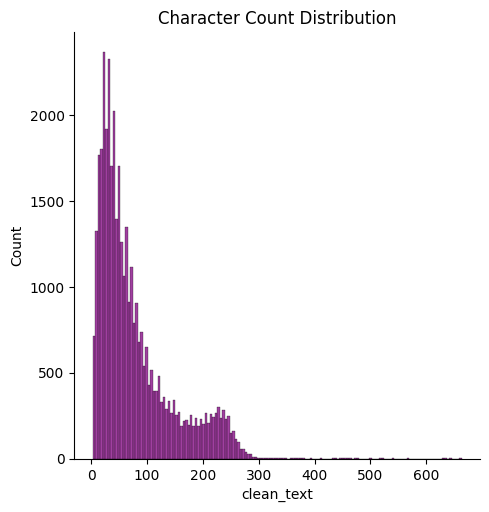

In [15]:
sns.displot(df['clean_text'].str.len(), color='purple')
plt.title('Character Count Distribution')
plt.show()


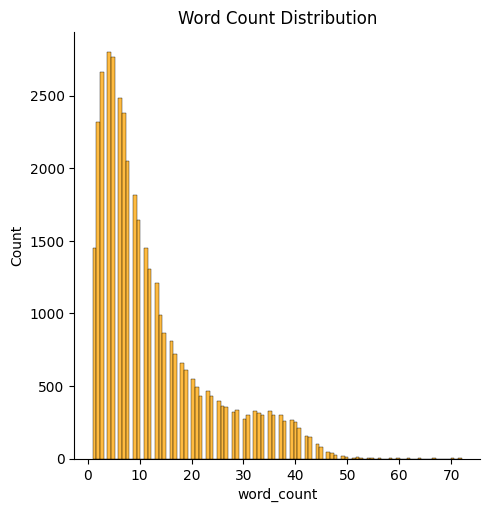

In [16]:
df['word_count'] = df['clean_text'].str.split().str.len()
sns.displot(df['word_count'], color='orange')
plt.title('Word Count Distribution')
plt.show()

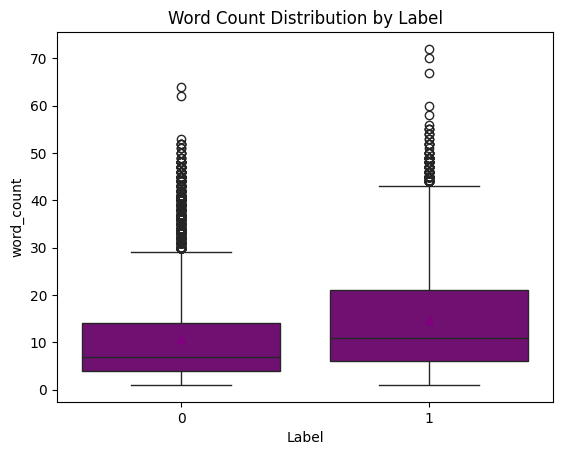

In [17]:
sns.boxplot(x='Label', y='word_count', showmeans=True, data=df)
plt.title('Word Count Distribution by Label')
plt.show()

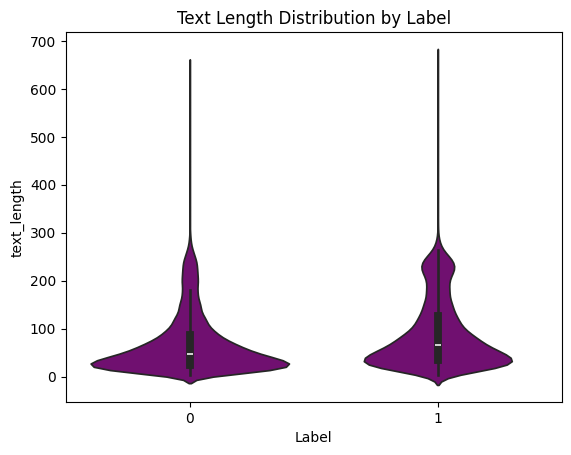

In [18]:
# Calculate text length and store it in a new column
df['text_length'] = df['clean_text'].str.len()

sns.violinplot(x="Label", y="text_length", data=df)
plt.title('Text Length Distribution by Label')
plt.show()

In [19]:
from collections import Counter

# Convert all values in 'clean_text' to strings
df['clean_text'] = df['clean_text'].astype(str)

# Proceed with counting words
word_counts = Counter(" ".join(df['clean_text']).split())

print(word_counts.most_common(10)) # Print 10 most common words

[('nan', 163089), ('the', 15595), ('ghetto', 13436), ('slut', 11148), ('and', 9527), ('you', 9062), ('not', 6444), ('that', 5302), ('for', 4932), ('are', 4368)]


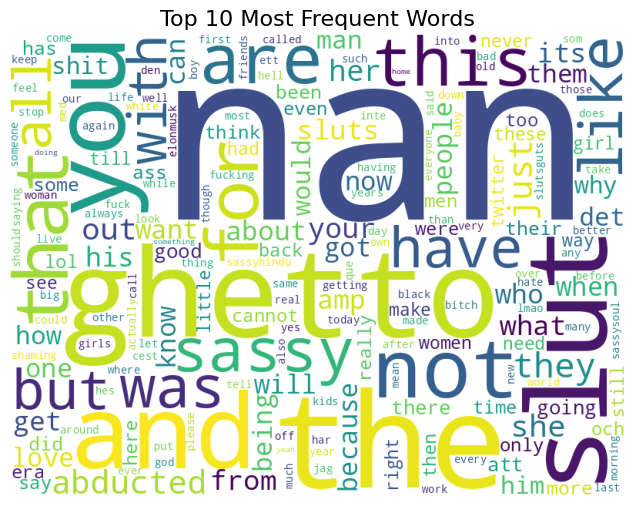

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create the word cloud
wordcloud = WordCloud(background_color="white", width=800, height=600).generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Top 10 Most Frequent Words", fontsize=16)
plt.show()


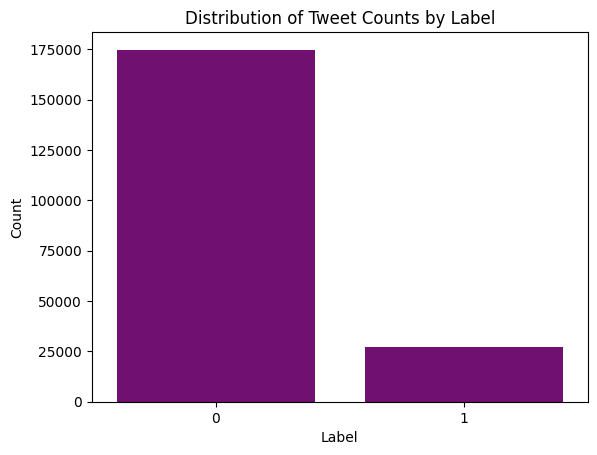

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = df['Label'].value_counts()

# Create a bar plot
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Tweet Counts by Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [22]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [23]:
import pandas as pd
import plotly.express as px

# Check if filtered text exists (modify column name if different)
if 'filtered_text' in df.columns:

  # Calculate character count and store in a new column
  df['char_count'] = df['filtered_text'].str.len()

  # Character count distribution using the new column
  # Use 'Label' column for coloring the histogram
  fig = px.histogram(df, x='char_count', title='Character Count Distribution in Filtered Text', color='Label')
  fig.update_traces(marker=dict(line=dict(color='green', width=2)))
  fig.update_layout(showlegend=False, width=800, height=500)
  fig.show()

  # Word count distribution (assuming word splitting is preserved)
  df['filtered_word_count'] = df['filtered_text'].str.split().str.len()
  # Use 'Label' column for coloring the histogram
  fig = px.histogram(df, x='filtered_word_count', title='Word Count Distribution in Filtered Text', color='Label')
  fig.update_traces(marker=dict(line=dict(color='white', width=2)))
  fig.update_layout(showlegend=False, width=800, height=500)
  fig.show()


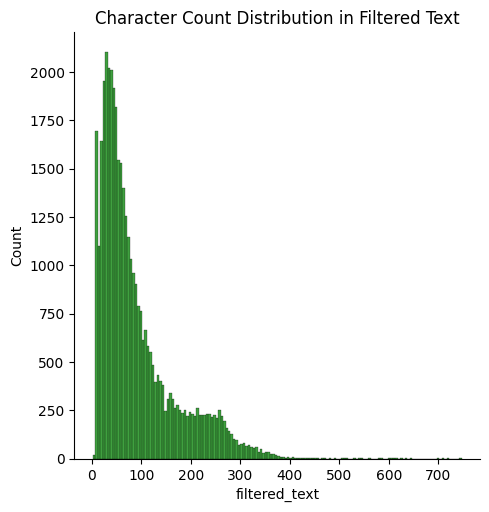

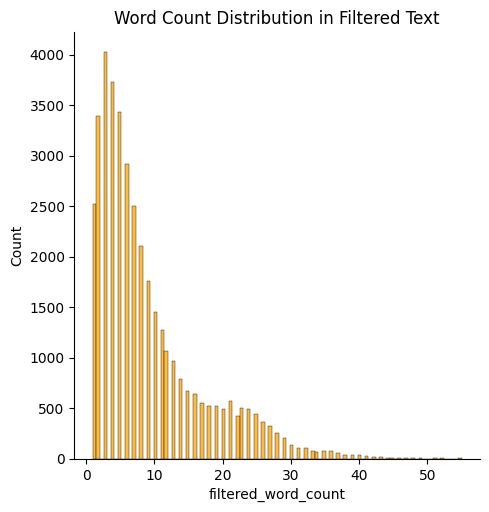

In [24]:
# Check if filtered text exists (modify column name if different)
if 'filtered_text' in df.columns:
  # Character count distribution
  sns.displot(df['filtered_text'].str.len(), color='green')
  plt.title('Character Count Distribution in Filtered Text')
  plt.show()

  # Word count distribution (assuming word splitting is preserved)
  df['filtered_word_count'] = df['filtered_text'].str.split().str.len()
  sns.displot(df['filtered_word_count'], color='orange')
  plt.title('Word Count Distribution in Filtered Text')
  plt.show()


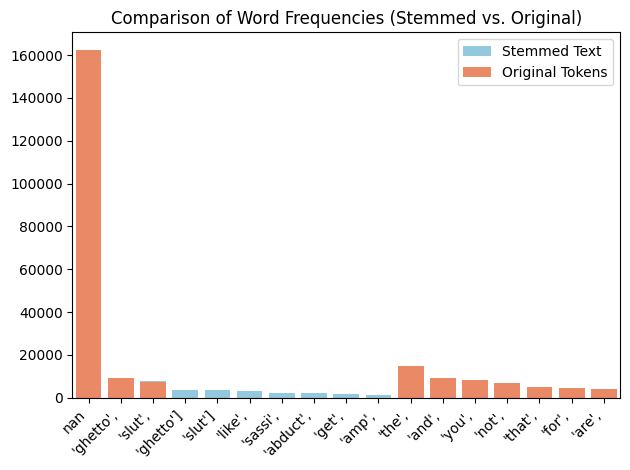

In [25]:
from collections import Counter

# Combine all stemmed words for counting, converting non-strings to strings
all_stemmed_words = " ".join([str(word) for word in df['stemmed_text']])
stemmed_word_counts = Counter(all_stemmed_words.split())

# Combine all tokens for counting (assuming tokenized_text exists), converting non-strings to strings
all_tokens = " ".join([str(word) for word in df['tokenized_text']])
token_counts = Counter(all_tokens.split())

# Plot the comparison (adjust number of words as needed)
sns.barplot(x=[word for word, count in stemmed_word_counts.most_common(10)],
            y=[count for word, count in stemmed_word_counts.most_common(10)],
            label='Stemmed Text', color='skyblue')
sns.barplot(x=[word for word, count in token_counts.most_common(10)],
            y=[count for word, count in token_counts.most_common(10)],
            label='Original Tokens', color='coral')
plt.title('Comparison of Word Frequencies (Stemmed vs. Original)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
import plotly.express as px

# Assuming your data is loaded in a DataFrame named `df`

if 'Label' in df.columns:
  # Calculate the counts of each label
  label_counts = df['Label'].value_counts()
  fig = px.pie(label_counts,
              values=label_counts.values,  # Use the counts as values
              names=label_counts.index,    # Use the labels as names
              hole=0.5,
              title='Distribution of Tweets by Label')

  # Update layout for left alignment
  fig.update_layout(
      margin=dict(l=200, r=0, b=20, t=50),  # Adjust margins for left alignment
      title_x=0.5  # Center the title horizontally
  )

  # Update text properties
  fig.update_traces(textposition='inside', textfont_size=14)

  fig.show()


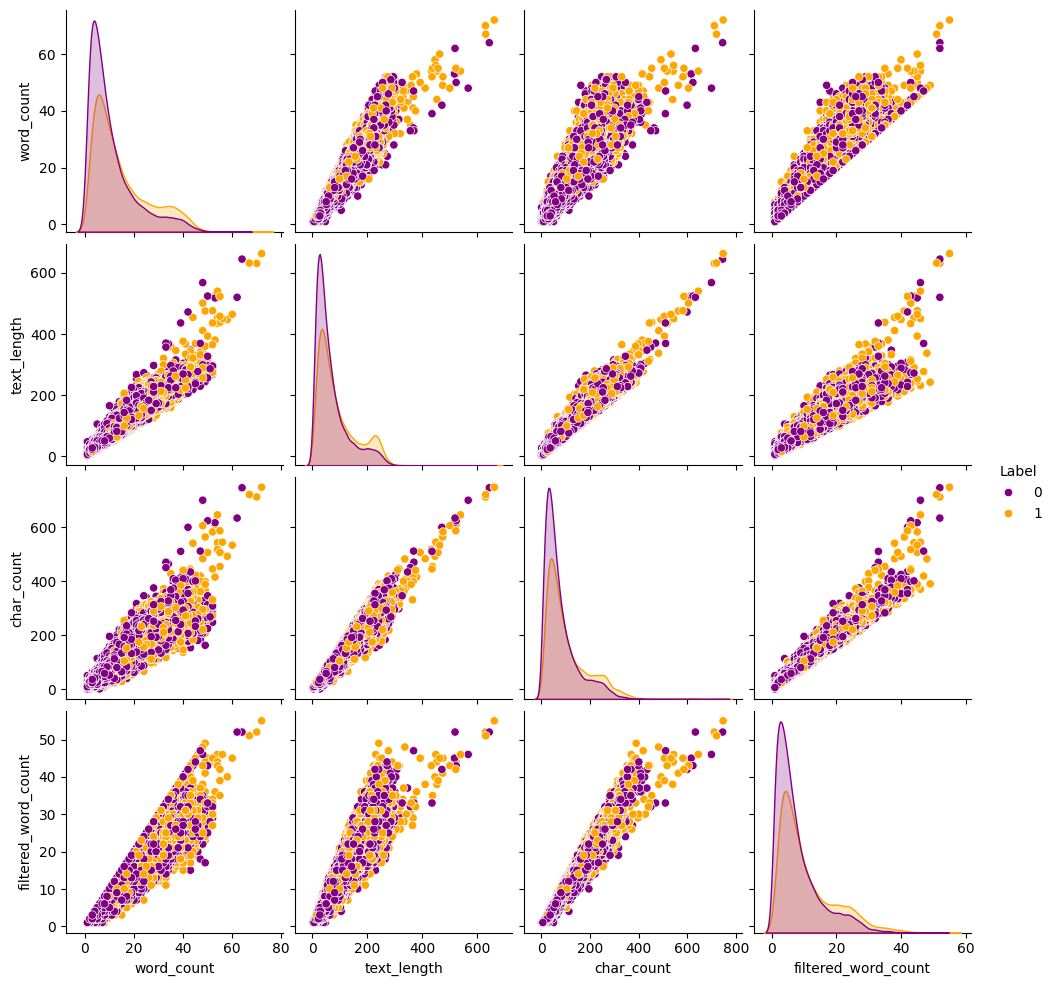

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df,hue='Label')